<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


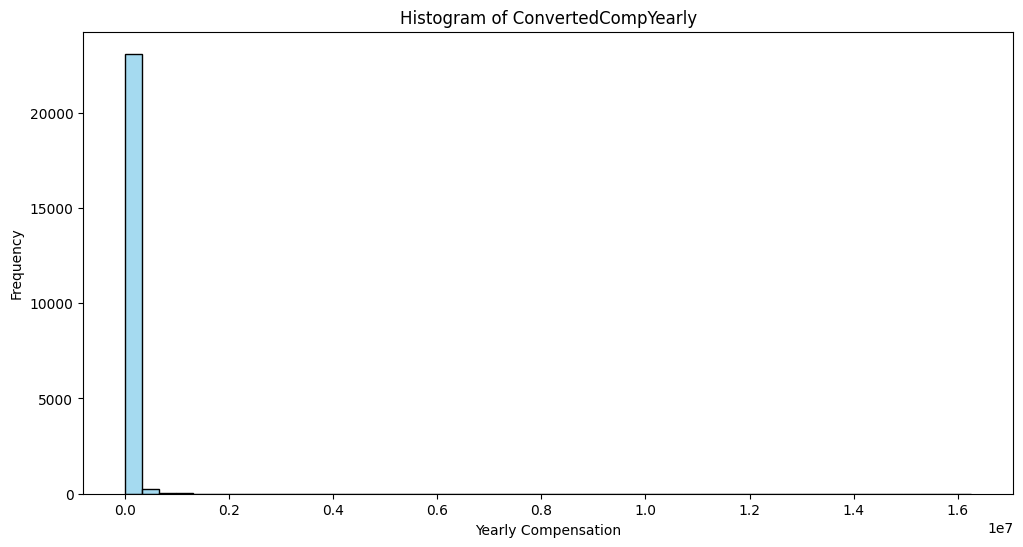

/tmp/ipykernel_1485/1836234883.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comp_data, shade=True, color='orange')


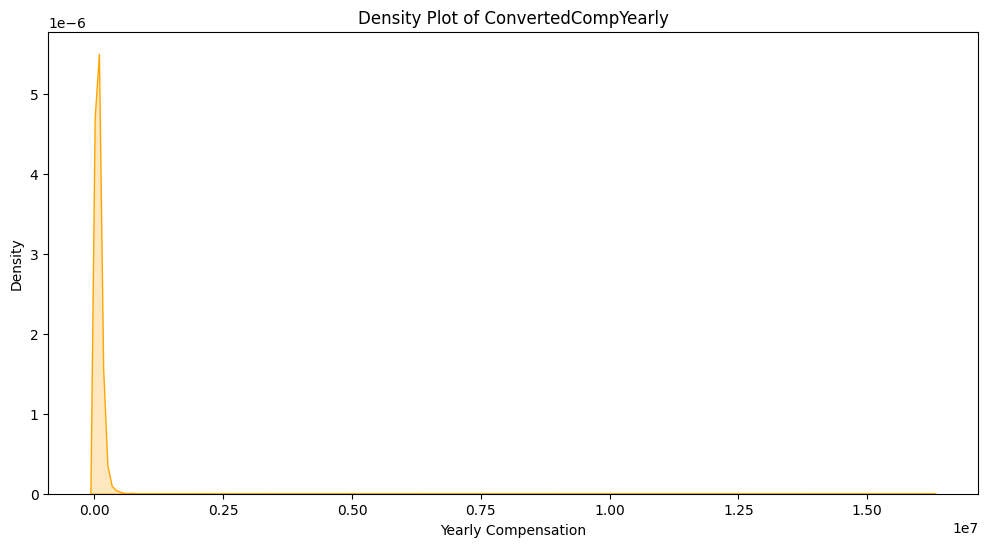

In [3]:
comp_data = df['ConvertedCompYearly'].dropna()

plt.figure(figsize=(12, 6))
sns.histplot(comp_data, bins=50, kde=False, color='skyblue')
plt.title("Histogram of ConvertedCompYearly")
plt.xlabel("Yearly Compensation")
plt.ylabel("Frequency")
plt.show()

# Plot density (KDE) for smooth distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(comp_data, shade=True, color='orange')
plt.title("Density Plot of ConvertedCompYearly")
plt.xlabel("Yearly Compensation")
plt.ylabel("Density")
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
# Filter for full-time employed respondents
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation
median_comp_full_time = full_time_df['ConvertedCompYearly'].median()

print(f"Median yearly compensation for full-time employed respondents: ${median_comp_full_time:,.2f}")


Median yearly compensation for full-time employed respondents: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



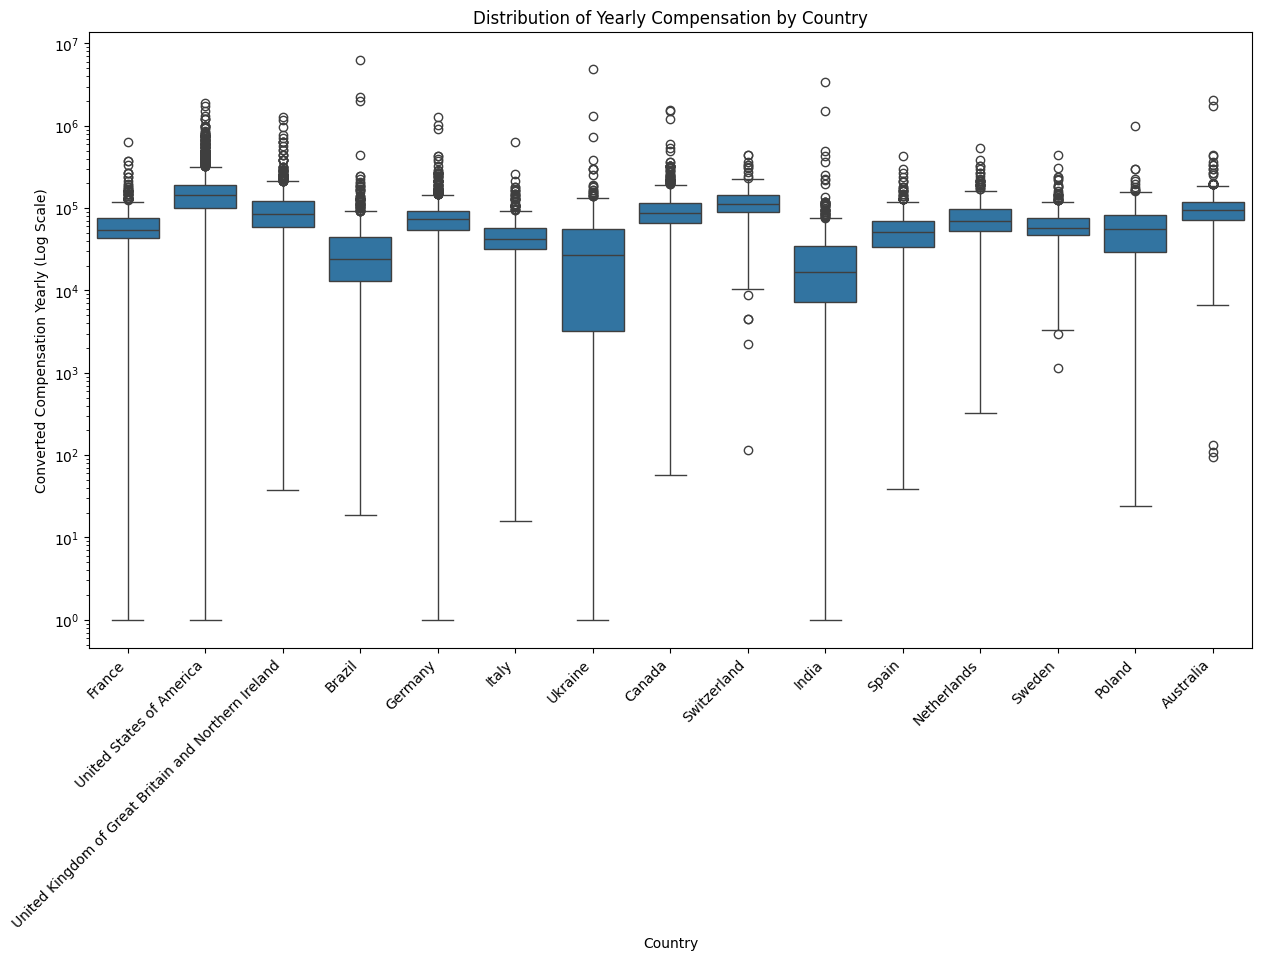

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing Country values if any
df['Country'] = df['Country'].fillna('Unknown')

# Remove rows with missing compensation
df_country_comp = df.dropna(subset=['ConvertedCompYearly'])

# Optionally, focus on top countries by number of respondents for clarity
top_countries = df_country_comp['Country'].value_counts().nlargest(15).index
df_top_countries = df_country_comp[df_country_comp['Country'].isin(top_countries)]

# Plot box plot for compensation by country
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Log scale to handle wide compensation range
plt.title('Distribution of Yearly Compensation by Country')
plt.xlabel('Country')
plt.ylabel('Converted Compensation Yearly (Log Scale)')
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                (df['ConvertedCompYearly'] <= upper_bound)]

# Check size of the new DataFrame
print(f"Original dataset size: {df.shape[0]}")
print(f"Refined dataset size after removing outliers: {df_refined.shape[0]}")


Original dataset size: 65437
Refined dataset size after removing outliers: 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.032388
JobSatPoints_1                 -0.058170 -0.032388        1.000000


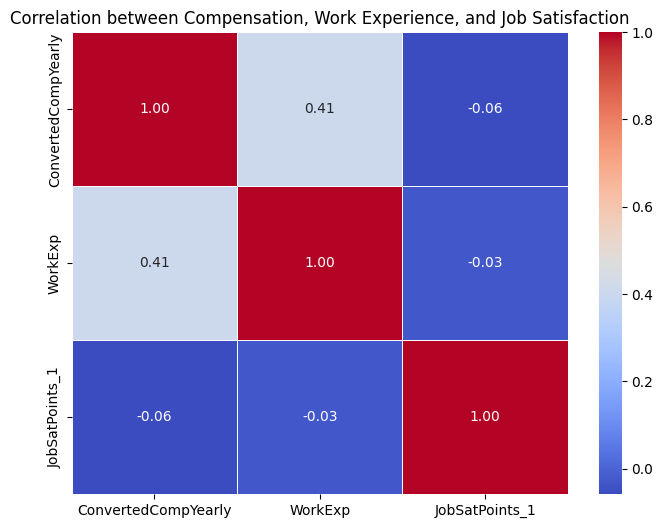

In [7]:
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df_corr = df_refined[cols]

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Compensation, Work Experience, and Job Satisfaction')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


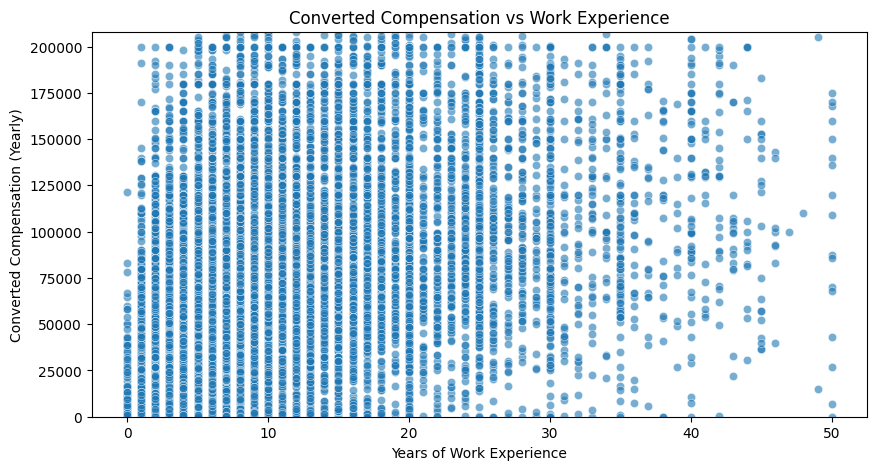

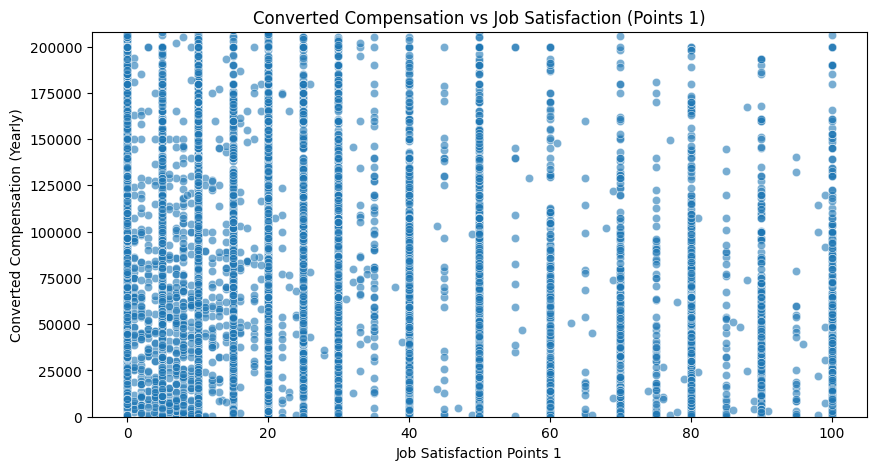

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: ConvertedCompYearly vs WorkExp
plt.figure(figsize=(10,5))
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df_refined, alpha=0.6)
plt.title('Converted Compensation vs Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Converted Compensation (Yearly)')
plt.ylim(0, df_refined['ConvertedCompYearly'].quantile(0.99))  # Limit y-axis to 99th percentile to reduce extreme outliers
plt.show()

# Scatter plot: ConvertedCompYearly vs JobSatPoints_1
plt.figure(figsize=(10,5))
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df_refined, alpha=0.6)
plt.title('Converted Compensation vs Job Satisfaction (Points 1)')
plt.xlabel('Job Satisfaction Points 1')
plt.ylabel('Converted Compensation (Yearly)')
plt.ylim(0, df_refined['ConvertedCompYearly'].quantile(0.99))  # Limit y-axis to 99th percentile
plt.show()


In [9]:
median_compensation = df['ConvertedCompYearly'].median()
print("Median ConvertedCompYearly:", median_compensation)

Median ConvertedCompYearly: 65000.0


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
